<a href="https://colab.research.google.com/github/opark03/Notebooks/blob/main/notebooks/13-pandas-deeper-cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Data Cleaning II

```
  University of Virginia
  DS1002: Programming for Data Science
  Last Updated: October 1, 2023
```

## PREREQUISITES
- data types
- pandas dataframes
- pandas data cleaning I

## OBJECTIVES
- Problems with text and categorical data

## Data Cleaning in Pandas

**Why do we need to clean data?**

![](https://ds1002-resources.s3.amazonaws.com/images/workflow.png)

## Data Type Constraints

We need to make sure our variables have the correct data types, other wise we risk compromising our analysis.

Example:


In [4]:
import pandas as pd
import numpy as np

In [5]:
# import `sales.csv`
sales = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/sales.csv')
sales.head(2)

,SalesOrderID,Revenue,Quantity
0,43659,23153$,12
1,43660,1457$,2


We want to calculate total revenue.

In [6]:
# sum by contatination - sees values as a string and sums them together
sales['Revenue'].sum()

'23153$1457$3857$15748$18067$5978$2985$28567$9865$2314$3459$8736$16732$21562$'

This produces some sort of numerical/repeating error we need to solve. Let's examine the data types of the columns.

In [7]:
sales.dtypes

SalesOrderID     int64
Revenue         object
Quantity         int64
dtype: object

And next let's look at some rows to see what we find.

In [11]:
sales.head(20)

,SalesOrderID,Revenue,Quantity
0,43659,23153,12
1,43660,1457,2
2,43661,3857,3
3,43662,15748,8
4,43663,18067,10
5,43664,5978,4
6,43665,2985,3
7,43666,28567,15
8,43667,9865,6
9,43668,2314,3


In [12]:
# remove $ from Revenue columns to create an integer
# first recognize as a string but strip out the dollar sign
sales['Revenue'] = sales['Revenue'].str.strip('$')
# now change the type to integers
sales['Revenue'] = sales['Revenue'].astype('int')

AttributeError: ignored

In [13]:
sales.head(5)

,SalesOrderID,Revenue,Quantity
0,43659,23153,12
1,43660,1457,2
2,43661,3857,3
3,43662,15748,8
4,43663,18067,10


In [14]:
# confirm they are integers
sales.dtypes

SalesOrderID    int64
Revenue         int64
Quantity        int64
dtype: object

In [15]:
# verify that Revenue is now an integer
assert sales['Revenue'].dtype == 'int'

## Numeric or categorical data

Example:

In [16]:
# import `marriage_status.csv`
marriage_status = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/marriage_status.csv')
marriage_status.head(3)

,marriage_status
0,divorced
1,separated
2,married


In [17]:
# very messy data with different versions of data
marriage_status.head(50)

,marriage_status
0,divorced
1,separated
2,married
3,UNMARRIED
4,MARRIED
5,MARRIED
6,married
7,unmarried
8,UNMARRIED
9,divorced


`0` = Never Married
`1` = Married
`2` = Separated
`3` = Divorced

In [18]:
marriage_status['marriage_status'].describe()

count          21
unique          6
top       married
freq            6
Name: marriage_status, dtype: object

Calculated as a numeric variables when in reality a categorical.  

Let's change the the data type to `categorical`

In [19]:
marriage_status['marriage_status'] = marriage_status['marriage_status'].astype('category')

In [20]:
marriage_status.describe()

,marriage_status
count,21
unique,6
top,married
freq,6


Pandas now gives summary outputs consistant with a `categorical` variable.

## Out of Range Data

Out of range data can occur from human error, data collection error, etc.   

Let's work through a couple examples

**`Movie Ratings`**  

consists of `name`, `year`, and `score` (0-10)  

**`User Signups`**  

consists of `subscription_date`, `user_name`, `country`  

In [21]:
# import movie_ratings.csv

movies = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/movies.csv')
movies.head(2)

,Name,Year,Score
0,Twleve Angry Men,1957,8.9
1,Alien,1979,8.4


Text(0.5, 1.0, 'Average rating of top 50 movies (0-10')

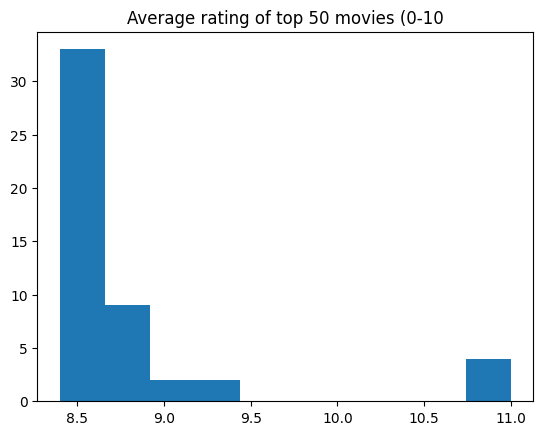

In [22]:
# data viz
# outputs values greater than 10- means there is out of range data
import matplotlib.pyplot as plt
plt.hist(movies['Score'])
plt.title('Average rating of top 50 movies (0-10')

In [23]:
# import `user_signups`
users = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/user_signups.csv')
users.tail()

,subscription_date,user_name,country
7,7/3/23,Leo,USA
8,5/1/23,Marc,USA
9,10/10/23,Lou,USA
10,11/15/23,Sheng,USA
11,12/3/23,Nancy,USA


In [24]:
users.dtypes

subscription_date    object
user_name            object
country              object
dtype: object

In [25]:
#import datetime
import datetime as dt

#convert object to date
users['subscription_date'] = pd.to_datetime(users['subscription_date'])
users.dtypes


subscription_date    datetime64[ns]
user_name                    object
country                      object
dtype: object

In [24]:
users.head()

,subscription_date,user_name,country
0,2021-01-05,Mariah,USA
1,2020-09-09,Joshua,USA
2,2020-04-01,Heidi,USA
3,2020-11-10,Christine,USA
4,2020-11-07,Ayanna,USA


In [26]:
#convert object to date
users['subscription_date'] = pd.to_datetime(users['subscription_date']).dt.date
users.dtypes

subscription_date    object
user_name            object
country              object
dtype: object

In [27]:
today_date = dt.date.today()
users[users['subscription_date'] > today_date]

,subscription_date,user_name,country
9,2023-10-10,Lou,USA
10,2023-11-15,Sheng,USA
11,2023-12-03,Nancy,USA


## How to deal without out of range data

1. Drop data
 - not advised unless very small propotion of data
 - may be removing otherwise important data

2. Treat data as missing
- can then impute data

3. Set a custom value depending on the business assumptions

**always document decision and steps!**

In [28]:
# Let's look at the `movies` df

movies[movies['Score'] > 10]

,Name,Year,Score
6,Fight Club,1999,11.0
12,Inception,2010,11.0
22,Pulp Fiction,1994,11.0
40,The Lord of the Rings: The Fellowship of the Ring,2001,11.0


## Dropping the values

In [29]:
# by filtering
movies1 = movies[movies['Score'] <= 10]

#check that values were dropped
movies1.sort_values(['Score'], ascending = False).head()

,Name,Year,Score
46,The Shawshank Redemption,1994,9.2
34,The Godfather,1972,9.2
32,The Dark Knight,2008,9.0
35,The Godfather Part II,1974,9.0
0,Twleve Angry Men,1957,8.9


In [30]:
# with .drop() function
movies2 = movies.drop(movies[movies['Score'] > 10].index)
movies2.sort_values('Score', ascending = False).head()

,Name,Year,Score
46,The Shawshank Redemption,1994,9.2
34,The Godfather,1972,9.2
32,The Dark Knight,2008,9.0
35,The Godfather Part II,1974,9.0
0,Twleve Angry Men,1957,8.9


In [31]:
# convert Score > 10 to 10
movies.loc[movies['Score']> 10, 'Score'] = 10

assert movies['Score'].max() <= 10

## Categorical Data & Membership Constraints

- Has a predefined set of categories

- Value can only be one of the membership categories

- Often coded as numbers for further analysis techniques (like machine learning)

### Concerns in categorical data

1. Errors occur when observations have values that go beyond the predefined catogories

2. Errors also occur with inconsistent fields

3. Needing to collapse categories

4. Data type not being defined as 'category'

### Fixing observations that go beyond predefined categories

- We can drop, remap, or infer categories to fix

- We covered simple examples of these during Pandas Data Cleaning I

- Here is more complex example:

In [32]:
# import csv's

study = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/study.csv')
categories = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/blood_categories.csv')

In [33]:
study

,name,birthday,blood_type
0,Beth,10/20/19,B-
1,Paul,7/8/20,A-
2,Helen,8/12/19,O+
3,Jennifer,3/17/19,O-
4,Keith,12/17/19,Z+
5,Kelly,4/27/20,A+
6,Rachel,4/19/19,AB+


In [34]:
categories

,blood_type
0,O-
1,O+
2,A-
3,A+
4,B+
5,B-
6,AB+
7,AB-


We can check for errors with using joins.

![](https://ds1002-resources.s3.amazonaws.com/images/joins.png)

**So a left anti join between study and categories would give us this:**

![](https://ds1002-resources.s3.amazonaws.com/images/antijoin.png)

**An inner join between study and category would give us:**

![](https://ds1002-resources.s3.amazonaws.com/images/innerjoin.png)

**Let's do this in python**

**`.set()`**  
**`.difference()`**

[Geeks for Geeks](https://www.geeksforgeeks.org/python-set-difference/)

*Note: these are from python not pandas*

In [35]:
# find inconsistent categories

inconsistent_categories = set(study['blood_type']).difference(categories['blood_type'])
inconsistent_categories

{'Z+'}

In [36]:
# find inconsistent rows

inconsistent_rows = study['blood_type'].isin(inconsistent_categories) # gives a boolean series
study[inconsistent_rows] # subset study dataframe based on boolean values

,name,birthday,blood_type
4,Keith,12/17/19,Z+


In [37]:
# one way to drop inconsistent rows (other ways in pandas cleaning I)
consistent_data = study[~inconsistent_rows]
consistent_data

,name,birthday,blood_type
0,Beth,10/20/19,B-
1,Paul,7/8/20,A-
2,Helen,8/12/19,O+
3,Jennifer,3/17/19,O-
5,Kelly,4/27/20,A+
6,Rachel,4/19/19,AB+


### Fixing value inconsistency

In [38]:
# import `marriage_status` dataset
marriage = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/marriage_status.csv')

In [39]:
marriage.head()

,marriage_status
0,divorced
1,separated
2,married
3,UNMARRIED
4,MARRIED


In [40]:
marriage['marriage_status'].value_counts()

married      6
unmarried    4
divorced     3
separated    3
UNMARRIED    3
MARRIED      2
Name: marriage_status, dtype: int64

For this example we can either capitalize or lowercase the values:

In [41]:
# Capitalize
marriage['marriage_status'] = marriage['marriage_status'].str.upper()
marriage['marriage_status'].value_counts()

MARRIED      8
UNMARRIED    7
DIVORCED     3
SEPARATED    3
Name: marriage_status, dtype: int64

In [42]:
# Lowercase
marriage['marriage_status'] = marriage['marriage_status'].str.lower()
marriage['marriage_status'].value_counts()


married      8
unmarried    7
divorced     3
separated    3
Name: marriage_status, dtype: int64

### Collapsing data into categories

* Often we will need to distill continuous data into categories
* Categories should have evidence-based backing behing them
* Cateogires can increase interpretability but can also lose valuable information

In [43]:
income = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/income.csv')


**`.qcut()`**

* automatically divides data into categories based on the argument `q` and the distribution of data

In [44]:
group_names = ['0-100K', '100K-250K', '250K-500K', '500K+']
income['income_group'] = pd.qcut(income['household_income'], q = 4,
                                     labels = group_names)

income[['income_group', 'household_income']]

,income_group,household_income
0,100K-250K,88000
1,0-100K,47000
2,500K+,155000
3,250K-500K,147000
4,500K+,250000
5,100K-250K,107000
6,500K+,700000
7,250K-500K,120000
8,100K-250K,90000
9,0-100K,33000


**`.cut()`**

* Allows you to use categories cut-off ranges with the `bins` arguement

In [45]:
ranges = [0, 100000, 500000, np.inf]
group_names = ['0-100K', '100K-500K', '500K+']
income['income_group'] = pd.cut(income['household_income'], bins = ranges,
                                     labels = group_names)

income[['income_group', 'household_income']]

,income_group,household_income
0,0-100K,88000
1,0-100K,47000
2,100K-500K,155000
3,100K-500K,147000
4,100K-500K,250000
5,100K-500K,107000
6,500K+,700000
7,100K-500K,120000
8,0-100K,90000
9,0-100K,33000


## Map categories into fewer ones

In [46]:
computer = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/computer.csv')

We want to collapse the `operating system` column into `'DesktopOS', 'MobileOS'`

In [47]:
# create dictionary
mapping = {'Microsoft': 'DesktopOS', 'MacOS': 'DesktopOS', 'Linux': 'DesktopOS', 'IOS': 'MobileOS', 'Android': 'MobileOS'}

# use `.replace`
computer['operating_system_category'] = computer['operating_system'].replace(mapping)
computer['operating_system_category'].unique()

array(['DesktopOS', 'MobileOS'], dtype=object)

In [48]:
computer.head()

,operating_system,operating_system_category
0,Microsoft,DesktopOS
1,MacOS,DesktopOS
2,IOS,MobileOS
3,Android,MobileOS
4,Linux,DesktopOS


## Text Data

* Common type of data

* Common text data problems are:
1) data inconsistency
2) fixed length violations
3) typos

In [49]:
phones = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/phone_numbers.csv')
phones

,full_name,phone_number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,+1-297-996-4904
4,Benedict G. Valdex,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


Ideally we want to remove dashes, have each phone number start with the full country code, and remove phone numbers that don't have full values listed.

In [50]:
# Replace the '+' with '00'
phones['phone_number'] = phones['phone_number'].str.replace('+', '00')
phones

<ipython-input-50-d8697e0de045>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  phones['phone_number'] = phones['phone_number'].str.replace('+', '00')


,full_name,phone_number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,001-297-996-4904
4,Benedict G. Valdex,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


In [51]:
# Replace the '-' with nothing
phones['phone_number'] = phones['phone_number'].str.replace('-', '')
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [52]:
# Replace phone numbers with lower than 10 digits to NaN
digits = phones['phone_number'].str.len() # gets the length of the each phone number
phones.loc[digits < 10, 'phone_number'] = np.nan # subset phone numbers with less than 10 digits, replace with NaN
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,NaN
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [53]:
# checking data with assert statements

# find length of each row in phone_number columns
sanity_check = phones['phone_number'].str.len()

# assert minimum phone_number lenth is 10
assert sanity_check.min() >= 10

# assert all number do not have a '+' or '-'
assert phones['phone_number'].str.contains('+|-').any() == False

error: ignored

In [ ]:
phones

### More complicated regular expression (`regex`) examples

* Regular expressions give us the ability to search for any pattern in text data, like only digits for example

* They are like control + find in your browser, but more dynamic and robust

[regex blog](https://www.analyticsvidhya.com/blog/2021/07/regular-expressions-in-python-a-beginners-guide/)

In [54]:
phones_complex = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/phone_numbers_complex.csv')
phones_complex

,full_name,phone_number
0,Olga Robinson,+(01706)-25891
1,Justina Kim,+0500-571437
2,Tamekah Henson,+0800-1111
3,Miranda Solis,+07058-979063
4,Caldwell Gilliam,+(016977)-8424


In [55]:
# replace letters with nothing

phones_complex['phone_number'] = phones_complex['phone_number'].str.replace(r'\D+', '') #\D+ mean anything that is not a digit, found in regex library
phones_complex

<ipython-input-55-48759818002c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  phones_complex['phone_number'] = phones_complex['phone_number'].str.replace(r'\D+', '') #\D+ mean anything that is not a digit, found in regex library


,full_name,phone_number
0,Olga Robinson,0170625891
1,Justina Kim,0500571437
2,Tamekah Henson,08001111
3,Miranda Solis,07058979063
4,Caldwell Gilliam,0169778424


## Data Uniformity

* We want data within columns to have the same units (temperature, weight, money)

* Or data, as as dates, to have the same format

In [56]:
temps = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/temperatures.csv')
temps.head()

,date,temperature
0,2019-03-03,14.0
1,2019-03-04,15.0
2,2019-03-05,18.0
3,2019-03-06,16.0
4,2019-03-07,62.6


**Let's look at graph**

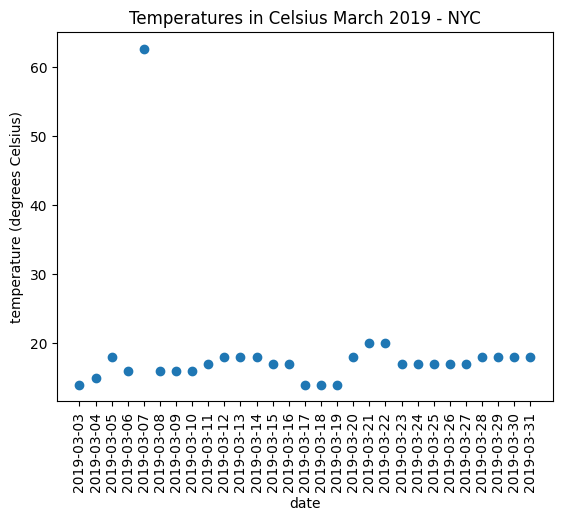

In [57]:
# import matplotlib
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(x = 'date', y = 'temperature', data = temps)

# create title, xlabel, and ylabel
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

# show plot
plt.show()

**Convert farhenheit data to celsius**

In [58]:
temp_fah = temps.loc[temps['temperature'] > 40, 'temperature'] # use .loc to subset data above 40

temp_cels = (temp_fah - 32) * (5/9) # convert to celsius

temps.loc[temps['temperature'] > 40, 'temperature'] = temp_cels

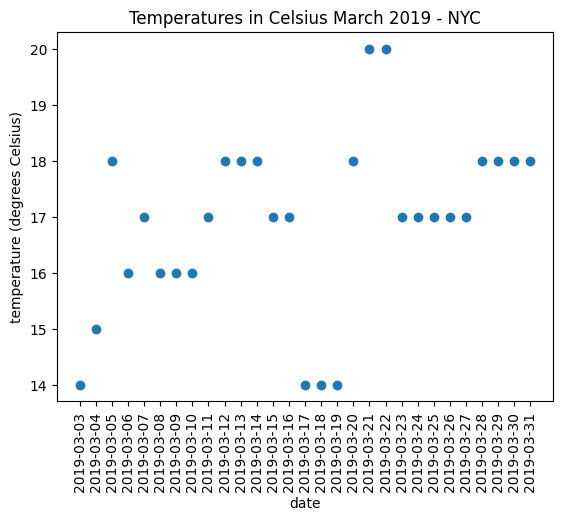

In [59]:
# import matplotlib
import matplotlib.pyplot as plt

# create a scatter plot
plt.scatter(x = 'date', y = 'temperature', data = temps)

# create title, xlabel, and ylabel
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

# show plot
plt.show()

**Clean-up Dates**

In [60]:
birthdays = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/birthdays.csv')
birthdays.head()

,birth_date,first_name,last_name
0,27/27/2019,Rowan,Nunez
1,3/29/19,Brynn,Yang
2,"March 3rd, 2019",Sophia,Reilly
3,24-03-19,Deacon,Prince
4,6/3/19,Griffith,Neal


The `datetime` package is useful for representing dates

[How to format dates in python](https://stackabuse.com/how-to-format-dates-in-python/)

We also use `pandas.to_datetime`
* can recognize more formats automatically
* sometimes fails with erroneous or unrecongizable formats

In [61]:
# converts to datetime
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'])

DateParseError: ignored

**Doesn't work!**

try:

In [62]:
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'],
                                        # attempt to infer format for each date
                                        infer_datetime_format = True,
                                        # return NA for rows where conversion failed
                                        errors = 'coerce')

In [63]:
birthdays.head()

,birth_date,first_name,last_name
0,NaT,Rowan,Nunez
1,2019-03-29,Brynn,Yang
2,2019-03-03,Sophia,Reilly
3,2019-03-24,Deacon,Prince
4,2019-06-03,Griffith,Neal


In [64]:
birthdays['birth_date'] = birthdays['birth_date'].dt.strftime('%d-%m-%Y')
birthdays.head()

,birth_date,first_name,last_name
0,NaN,Rowan,Nunez
1,29-03-2019,Brynn,Yang
2,03-03-2019,Sophia,Reilly
3,24-03-2019,Deacon,Prince
4,03-06-2019,Griffith,Neal


**Ambiguous Data**

Is `2019-03-08` in August or March?

* Can covnert to `NA` or treat accordingly
* Can infer - this is where knowing your data is useful